# 📗 02 - Exploration du dataset HICMA

## 🧩 1. Imports & configuration

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from pathlib import Path
import seaborn as sns

## 📁 2. Définition des chemins

In [2]:
base_path = Path("../data/raw/hicma")
sets = ["Set1", "Set2", "Set3"]

def load_labels(set_name):
    return pd.read_csv(base_path / set_name / "labels.csv")

df_all = pd.concat([
    load_labels(s).assign(set=s) for s in sets
], ignore_index=True)

df_all["label_len"] = df_all["label"].apply(len)


## 📊 3. Statistiques générales

Extrait du dataset :
   Unnamed: 0                                           img_name    class  \
0           0       012-Al-Baqara-2-156-Thuluth_segment_no_0.jpg  Thuluth   
1           1         013-3-Al-Imran-37-Thuluth_segment_no_0.jpg  Thuluth   
2           2         013-3-Al-Imran-37-Thuluth_segment_no_1.jpg  Thuluth   
3           3  02-Al-Fath-48-1to4-ThuluthNaskh-2_segment_no_0...  Thuluth   
4           4  02-Al-Fath-48-1to4-ThuluthNaskh-2_segment_no_5...  Thuluth   

                                               label   set  label_len  
0                           انا لله وانا اليه راجعون  Set1         24  
1        كلما دخل عليها زكريا المحراب وجد عندها رزقا  Set1         43  
2  قال يا مريم أن لك هذا قالت هو من عند الله إن ا...  Set1         72  
3  بسم الله الرحمن الرحيم إنا فتحنا لك فتحا مبينا...  Set1        264  
4                             بسم الله الرحمن الرحيم  Set1         22  

Distribution des styles :
class
Naskh       3735
Thuluth     1013
Diwani       243


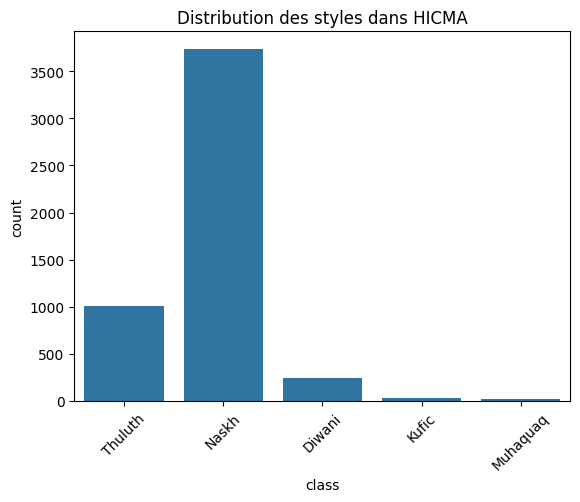

In [3]:
print("Extrait du dataset :")
print(df_all.head())

print("\nDistribution des styles :")
print(df_all["class"].value_counts())

sns.countplot(data=df_all, x="class")
plt.title("Distribution des styles dans HICMA")
plt.xticks(rotation=45)
plt.show()

## 📈 4. Longueur des labels

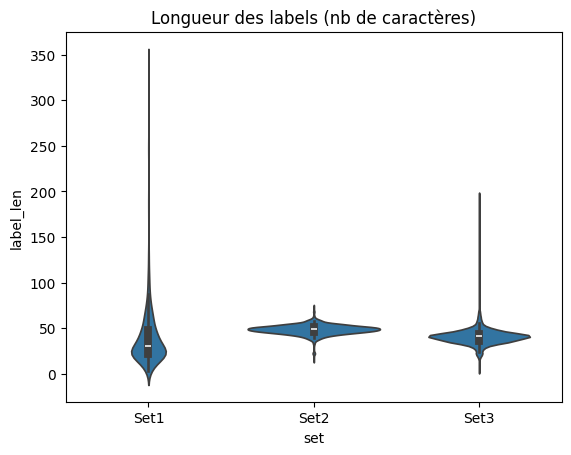

In [4]:
sns.violinplot(data=df_all, x="set", y="label_len")
plt.title("Longueur des labels (nb de caractères)")
plt.show()

## 🖼️ 5. Visualisation d’une image + texte

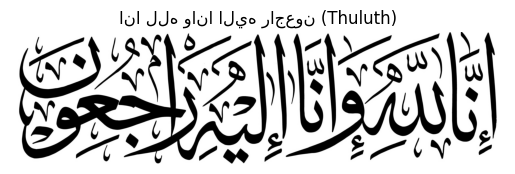

In [5]:
def show_sample(row):
    img_path = base_path / row["set"] / "images" / row["img_name"]
    image = Image.open(img_path)
    plt.imshow(image, cmap="gray")
    plt.title(f'{row["label"]} ({row["class"]})')
    plt.axis("off")
    plt.show()

# Exemple
show_sample(df_all.iloc[0])

## 🔠 6. Analyse des caractères

Top caractères :
   char  count
2        38697
0     ا  26226
3     ل  23616
11    م  14566
5     و  12233


c:\Users\hakim\OneDrive - Ifag Paris\arabic-handwriting-ocr\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 1750 (\N{ARABIC SMALL HIGH LIGATURE SAD WITH LAM WITH ALEF MAKSURA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\hakim\OneDrive - Ifag Paris\arabic-handwriting-ocr\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Matplotlib currently does not support Arabic natively.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\hakim\OneDrive - Ifag Paris\arabic-handwriting-ocr\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 1649 (\N{ARABIC LETTER ALEF WASLA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\hakim\OneDrive - Ifag Paris\arabic-handwriting-ocr\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 1751 (\N{ARABIC SMALL HIGH LIGATURE QAF WITH LAM WITH ALEF MAKSURA}) missing from font(s) DejaVu Sans.
  fig.can

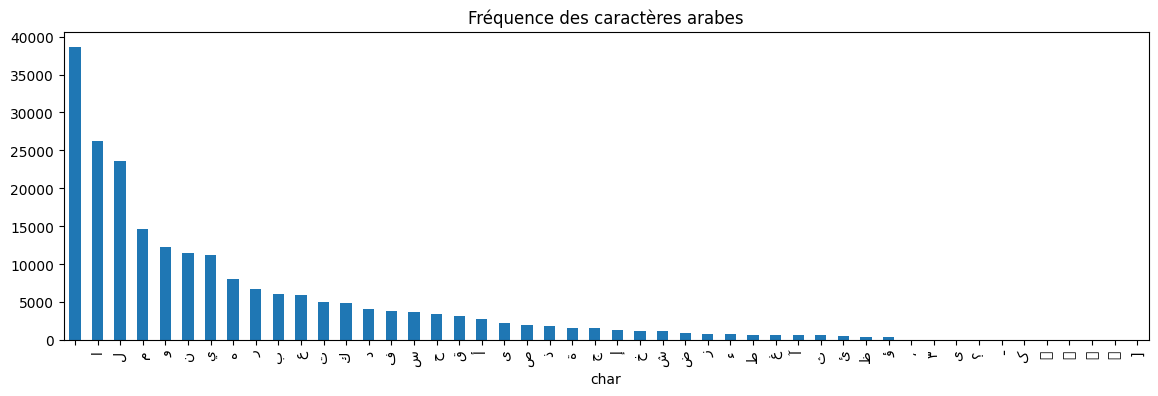

In [6]:
from collections import Counter

char_counter = Counter("".join(df_all["label"]))
df_chars = pd.DataFrame(char_counter.items(), columns=["char", "count"]).sort_values("count", ascending=False)

print("Top caractères :")
print(df_chars.head())

df_chars.set_index("char").plot(kind="bar", figsize=(14, 4), legend=False)
plt.title("Fréquence des caractères arabes")
plt.show()

# 🧹 Nettoyage HICMA

## 🧩 1. Imports & configuration

In [7]:
import unicodedata
import re
from pathlib import Path

## 🔤 2. Fonction de nettoyage minimal

In [8]:
ARABIC_LETTERS_PATTERN = re.compile(r'[\u0600-\u06FF]+', re.UNICODE)

def clean_arabic_text_minimal(text, verbose=False):
    original = text

    # Normalisation Unicode uniquement (pas de substitutions)
    text = unicodedata.normalize("NFC", text)

    # Extraction uniquement des lettres arabes (conserve toutes les variantes)
    text = " ".join(ARABIC_LETTERS_PATTERN.findall(text))

    if verbose:
        print(f"Avant : {original}")
        print(f"Après : {text}\n")

    return text

## 📄 3. Nettoyage du CSV HICMA

In [9]:
base_path

WindowsPath('../data/raw/hicma')

In [10]:
sets

['Set1', 'Set2', 'Set3']

In [20]:
def load_and_clean_labels(set_name):
    df = pd.read_csv(base_path / set_name / "labels.csv", index_col=0)
    df["label_clean"] = df["label"].apply(lambda t: clean_arabic_text_minimal(str(t)))
    df["set"] = set_name
    return df

In [21]:
df_all = pd.concat([load_and_clean_labels(s) for s in sets], ignore_index=True)
df_all

,img_name,class,label,label_clean,set
0,012-Al-Baqara-2-156-Thuluth_segment_no_0.jpg,Thuluth,انا لله وانا اليه راجعون,انا لله وانا اليه راجعون,Set1
1,013-3-Al-Imran-37-Thuluth_segment_no_0.jpg,Thuluth,كلما دخل عليها زكريا المحراب وجد عندها رزقا,كلما دخل عليها زكريا المحراب وجد عندها رزقا,Set1
2,013-3-Al-Imran-37-Thuluth_segment_no_1.jpg,Thuluth,قال يا مريم أن لك هذا قالت هو من عند الله إن ا...,قال يا مريم أن لك هذا قالت هو من عند الله إن ا...,Set1
3,02-Al-Fath-48-1to4-ThuluthNaskh-2_segment_no_0...,Thuluth,بسم الله الرحمن الرحيم إنا فتحنا لك فتحا مبينا...,بسم الله الرحمن الرحيم إنا فتحنا لك فتحا مبينا...,Set1
4,02-Al-Fath-48-1to4-ThuluthNaskh-2_segment_no_5...,Thuluth,بسم الله الرحمن الرحيم,بسم الله الرحمن الرحيم,Set1
...,...,...,...,...,...
5030,467-3.jpg,Naskh,و الشمس و ضحاها والقمر اذا تلاهاو النهار اذا ج...,و الشمس و ضحاها والقمر اذا تلاهاو النهار اذا ج...,Set3
5031,347-1.jpg,Naskh,ولجميع المسلمين الأحياء منهم والميتين وآخر دعوانا,ولجميع المسلمين الأحياء منهم والميتين وآخر دعوانا,Set3
5032,48-1.jpg,Naskh,على أبي بكر فقال لي يا عائشة ليدفنن في بيتك,على أبي بكر فقال لي يا عائشة ليدفنن في بيتك,Set3
5033,457-4.jpg,Naskh,و الكوثر و السلسبيل قاهر المضادين مبيد الكافرين,و الكوثر و السلسبيل قاهر المضادين مبيد الكافرين,Set3


## ⚠️ 5. Détection des labels vides / trop courts

In [23]:
df_all["label_len"] = df_all["label_clean"].str.len()
invalid = df_all[df_all["label_len"] < 2]

print(f"Labels trop courts : {len(invalid)}")
display(invalid[["label", "label_clean", "img_name", "class"]].head())

df_valid = df_all[df_all["label_len"] >= 2].copy()

Labels trop courts : 0


,label,label_clean,img_name,class


# 📄 COMPTE-RENDU — Limites de HICMA pour un système OCR arabe manuscrit

## 🎯 Objectif rappelé
Construire un système OCR capable de reconnaître des lettres, mots et phrases en arabe manuscrit, avec une bonne généralisation, malgré la complexité des formes, ligatures et styles d’écriture arabes.

## ❌ Pourquoi le dataset HICMA n’est pas adapté pour cet objectif ?
|Critère | Limitation |
|:---|:---|
|📦 Volume	|Seulement ~500 exemples utilisables (504 après concaténation)|
|🆎 Granularité	|Aucun découpage au niveau du mot ou du caractère|
|🔁 Diversité lexicale	|Faible : phrases longues, peu de mots isolés ou fréquemment utilisés|
|🎨 But initial	|Ciblé pour la classification de style calligraphique, non pour OCR|
|🖼️ Structure des images|Complexe, parfois bruitée ou artistique, difficile à segmenter ou transformer|
|📊 Distribution des lettres|Très déséquilibrée : certaines lettres très fréquentes, d’autres quasi absentes|
|🧠 Complexité contextuelle|Peu exploitable pour entraîner un modèle lettre à lettre ou mot à mot|

## ✅ Utilisations possibles de HICMA (hors objectif principal)

- Évaluation en conditions réelles ("in-the-wild")
- Fine-tuning sur style manuscrit réel
- Benchmark de robustesse sur calligraphies complexes